In [1]:
import pandas as pd
import numpy as np
import requests
import re

In [2]:
def remove_hashtags(text):
    text = re.sub(r'@\w+', '', text)
    return text
def remove_emojis(text):
    text = [x for x in text.split(' ') if x.isalpha()]
    text = ' '.join(text)
    return text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_urls(text):
    text = re.sub(r'http\S+', '', text)
    return text
def preprocess(text):
    text = remove_hashtags(text)
    text = remove_emoji(text)
    text = remove_urls(text)
    return text


def clean_text(text):  

    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى",
              "\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا",
               "","","","ي","",' ', ' ',' ',' ? ',' ؟ ', ' ! ']
    #remove tashkeel
    tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(tashkeel,"", text)
  
    text =remove_emojis(text)
    text=remove_hashtags(text)
    text = remove_urls(text)
    
    text = re.sub(r"[^\w\s]", '', text)
    #remove english words
    text = re.sub(r"[a-zA-Z]", '', text)
    #remove spaces
    text = re.sub(r"\d+", ' ', text)
    text = re.sub(r"\n+", ' ', text)
    text = re.sub(r"\t+", ' ', text)
    text = re.sub(r"\r+", ' ', text)
    text = re.sub(r"\s+", ' ', text)
    #remove repetetions
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    
    text = text.strip()
    
    return text

In [5]:
data =pd.read_csv('data/dialect_dataset_loaded.csv')

In [6]:
data['text2'] = data['text'].apply(clean_text)

In [7]:
data

,id,dialect,text,text2
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,لكن بالنهايه ينتفض يغير
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,يعني هذا محسوب علي البشر حيونه وحشيه وتطلبون م...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي,مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,يسلملي مرورك وروحك
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,وين هل الغيبه اخ محمد
...,...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,مبسوطين منك اللي
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي,والله ماينده ابش يختي
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,الله يبارك فيها وبالعافيه


C:\Users\OKNASHAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

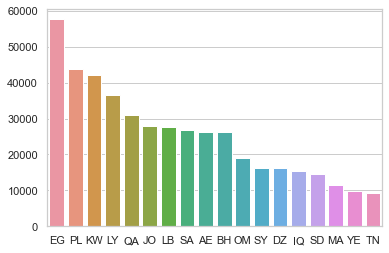

In [8]:
## pie chart of the distribution of the dialects
import matplotlib.pyplot as plt
import seaborn as sns
count_values = data['dialect'].value_counts()
sns.set(style="whitegrid")
sns.barplot(count_values.index,count_values.values)

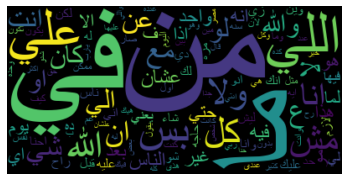

In [9]:
    # !pip install python-bidi
    text=data['text2'].values
    text=''.join(text)
    from collections import Counter
    from wordcloud import WordCloud          # pip install wordcloud
    import matplotlib.pyplot as plt          
    # -- Arabic text dependencies
    from arabic_reshaper import reshape      # pip install arabic-reshaper
    from bidi.algorithm import get_display   # pip install python-bidi

    rtl = lambda w: get_display(reshape(f'{w}'))

    COUNTS = Counter(text.split())
    counts = {rtl(k):v for k, v in COUNTS.most_common(120)}

    font_file = './NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
    wordcloud = WordCloud(font_path='arial').generate_from_frequencies(counts)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [10]:
stop =[rtl (i)for i in counts.keys()]
stop

['ﻣﻦ',
 'ﻓﻲ',
 'ﻣﺎ',
 'ﺍﻟﻠﻲ',
 'ﻋﻠﻲ',
 'ﺑﺲ',
 'ﷲ',
 'ﻣﺶ',
 'ﻭﻻ',
 'ﻛﻞ',
 'ﺍﻧﺎ',
 'ﺍﻥ',
 'ﻣﻊ',
 'ﺷﻲ',
 'ﻟﻮ',
 'ﻋﻦ',
 'ﻻ',
 'ﻭﷲ',
 'ﺍﻟﻲ',
 'ﻉ',
 'ﻛﺎﻥ',
 'ﺍﻭ',
 'ﺍﻧﺖ',
 'ﻋﺸﺎﻥ',
 'ﺍﻧﻪ',
 'ﺍﻟﻨﺎﺱ',
 'ﻭﺍﺣﺪ',
 'ﻓﻴﻪ',
 'ﻏﻴﺮ',
 'ﻫﻮ',
 'ﻣﻮ',
 'ﻫﺬﺍ',
 'ﺍﺫﺍ',
 'ﺑﻌﺪ',
 'ﺣﺘﻲ',
 'ﺍﻱ',
 'ﺍﻻ',
 'ﻳﻮﻡ',
 'ﻑ',
 'ﻟﻤﺎ',
 'ﻳﻌﻨﻲ',
 'ﻟﻲ',
 'ﻓﻴﻬﺎ',
 'ﺩﻩ',
 'ﺭﺍﺡ',
 'ﺣﺪ',
 'ﺩﻱ',
 'ﺷﻮ',
 'ﻗﺒﻞ',
 'ﻻﺯﻡ',
 'ﻟﻜﻦ',
 'ﻧﺎﺱ',
 'ﻋﻠﻴﻪ',
 'ﺍﻧﻲ',
 'ﺯﻱ',
 'ﻭﻳﻦ',
 'ﻭﺍﻧﺎ',
 'ﺍﻧﻚ',
 'ﻣﺮﻩ',
 'ﺍﺣﻨﺎ',
 'ﻋﻠﻴﻚ',
 'ﻟﻚ',
 'ﺷﺎﺀ',
 'ﻟﻪ',
 'ﺣﺎﺟﻪ',
 'ﻟﻴﺶ',
 'ﺍﻧﻮ',
 'ﻳﻜﻮﻥ',
 'ﻫﻲ',
 'ﻛﻨﺖ',
 'ﻋﻢ',
 'ﻭﻣﺎ',
 'ﻣﻤﻜﻦ',
 'ﺍﻭﻝ',
 'ﻣﺜﻞ',
 'ﺻﺎﺭ',
 'ﻛﻴﻒ',
 'ﺏ',
 'ﺍﻟﻴﻮﻡ',
 'ﺍﻳﻪ',
 'ﻭﺍﻧﺖ',
 'ﻧﻔﺲ',
 'ﺳﻨﻪ',
 'ﻻﻥ',
 'ﻋﻨﺪﻱ',
 'ﻫﻴﻚ',
 'ﺭﺑﻲ',
 'ﺭﺡ',
 'ﺍﻛﺜﺮ',
 'ﺧﻴﺮ',
 'ﺍﻧﺘﻲ',
 'ﻛﺪﻩ',
 'ﺣﻖ',
 'ﻣﻴﻦ',
 'ﻫﺬﻱ',
 'ﻛﺎﻧﺖ',
 'ﻛﺘﻴﺮ',
 'ﺷﻨﻮ',
 'ﻓﻴﻚ',
 'ﺟﺪﺍ',
 'ﺑﻌﺾ',
 'ﻗﺎﻝ',
 'ﻳﻘﻮﻝ',
 'ﻳﺎﺭﺏ',
 'ﺗﻜﻮﻥ',
 'ﺑﺪﻭﻥ',
 'ﻋﻨﺪﻩ',
 'ﻋﻨﺪ',
 'ﺑﻴﻦ',
 'ﻣﺼﺮ',
 'ﻭﺣﺪﻩ',
 'ﻭﻫﻮ',
 'ﻋﻠﻴﻬﺎ',
 'ﻭﻛﻞ',
 'ﻋﻠﺸﺎﻥ',
 'ﻭﺍﻟﻠﻲ',
 'ﺷﺨﺺ',
 'ﻛﻠﻪ',
 'ﻟﻴﻪ',
 'ﺣﺪﺍ']

In [12]:
df=pd.DataFrame(columns=['text2','dialect'])
for i in np.unique(data['dialect']):
    temp=data.loc[data['dialect']==i].iloc[:10000]
    print(temp.shape)
    df=df.append(temp,ignore_index=True)

(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(10000, 4)
(9246, 4)
(9927, 4)


C:\Users\OKNASHAR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

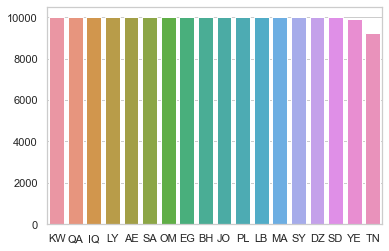

In [13]:
## pie chart of the distribution of the dialects
import matplotlib.pyplot as plt
import seaborn as sns
count_values = df['dialect'].value_counts()
sns.set(style="whitegrid")
sns.barplot(count_values.index,count_values.values)

In [27]:
data.to_csv('data/dialect_dataset_preprocessed.csv', index=False)